# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [42]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np

from scipy.stats import norm
import scipy.stats
import math

First, let's analyze the data: it has 130 0bservations and three columns,namely: temperature, gender and heart rate.

In [43]:
#descriptive statistics and visualizing data
len(df)


130

In [44]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [45]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [46]:
df.groupby('gender').mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [47]:
df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


In [48]:
df.groupby('gender').std()

,temperature,heart_rate
gender,,
F,0.743488,8.105227
M,0.698756,5.875184


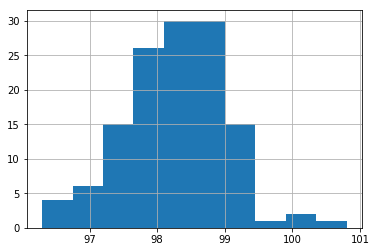

In [49]:
df.temperature.hist()

#1. Is the distribution of body temperatures normbody tal? 

In order to answer this question, we will first compare theoretical cdf of the normal curve and ecdf of body temperatures data. Then we will formally test whether distribution is normal or not.

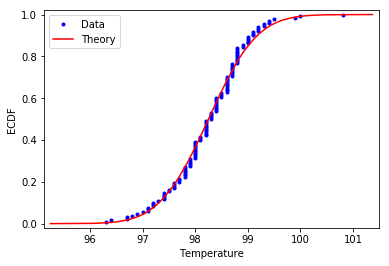

In [50]:
#Defining ECDF function
def edcf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x,y

#calculating EDCF values for the temperature data 
x,y = edcf(df['temperature'])


# Calculating the mean and standard deviation (std) of the temperature sample: tmean, tstd
tmean = np.mean(x)
tstd = np.std(x)

#Calculating data points for the normal distribution with parameters equal to mean and std of the sample. 
normaldata = np.random.normal(tmean,tstd,100000)

#Calculating DCF of the normal distribution for the mean and std of the temperature sample 
x_theor,y_theor = edcf(normaldata)

# plotting EDCF and DCF 
plt.plot(x,y, marker = '.',linestyle = 'none',color = 'blue');
plt.plot(x_theor,y_theor,color = 'red');
plt.margins(0.02);
plt.xlabel('Temperature');
plt.ylabel("ECDF");
plt.legend(['Data','Theory'])

Looking at the above visualization, theoretical normal and sample cdf overlaps with small divergence. Hence, with visual inspection, we can say that data looks like normally distributed. 

Now, we can formally test whether data is normally distributed or not. We can use  stats.normaltest function from scipy library to test the normality as below:

In [51]:
scipy.stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The result of normality test shows p-value of 0.25 (greater thann 0.05) shows no statistically significant difference from a normal distribution. In addition, tstatistic is greater than 2.0 indicates sample is normally distributed.

#2. Is the sample size large? Are the observations independent? 

First we calculate the size of sample.

In [52]:
len(df)

130

Sample size is greater than 30.  It is generally accepted that if a sample has more than 30 observations, 
the sample is large. 

Observations are independent as each random variable in the sample measures the temperature of person.

#3. Is the true population mean really 98.6 degrees F?

In this case, null hypothesis(H0) is true population mean= 98.6, alternatif (H1) true population mean is not 98.6. Z stats could be used as sample size is greater than 30. We will first calculate z-stats and then p value to test the hypothesis. If p value is smaller than 0.05 then null hypothesis is rejected

In [53]:
x = df['temperature']
se = x.std() / len(x) ** 0.5
z = (np.mean(x) - 98.6) / se
print('z-statistic: {:.6f}'.format(z))

z-statistic: -5.454823


In [54]:
p = scipy.stats.norm.sf(abs(z))*2
print('p-statistic: {:.6f}'.format(p))

p-statistic: 0.000000


P value is low (close to zero), z-stat is high (higher than 1.96, which is critical value at 0.05 significance level) hence we reject the null hypothesis that true mean equal 98.6 degrees F.

#4.Draw a small sample of size 10 from the data and repeat both frequentist tests. 

Selecting randomly 10 observations from the sample:

In [55]:
sample= np.random.choice(x, size=10)
sample

array([98. , 98.8, 98.8, 97.6, 96.9, 98.7, 98.8, 97.8, 98.3, 98.3])

In [57]:
sample_test=scipy.stats.ttest_1samp(sample, popmean=98.6)
print('t-statistic: %.4f | p-value: %.4f.' % sample_test)

t-statistic: -2.0000 | p-value: 0.0766.


P value is high, absolute value of t-statistic is lower than 1.96. Hence, we can not reject the null at 0.05 significance level. 

In [58]:
SE = sample.std() / len(sample) ** 0.5
z = (np.mean(sample) - 98.6) / SE
print('z-statistic: {:.6f}'.format(z))
p = scipy.stats.norm.sf(abs(z))*2
print('p-statistic: {:.6f}'.format(p))

z-statistic: -2.108185
p-statistic: 0.035015


P value is high, absolute value of t-statistic is lower than 1.96. Hence, we can not reject the null at 0.05 significance level. 

#5.At what temperature should we consider someone's temperature to be "abnormal"? 

Two Standard deviation above or below the mean of the sample could be considered as stastically outside of 'normal'. Hence we need to calculate confidence interval within 90% interval ( two tailed distribution within 5% interval).

In [59]:
print(np.percentile(x,[5,95]))

[97.045 99.3  ]


Calculation 90% confidence interval:

In [60]:
se = x.std() / len(x) ** 0.5
me = 1.96 * se
conf = (np.mean(x) - me, np.mean(x) + me)
conf

(98.12319411222852, 98.37526742623304)

In [61]:
high = str(np.mean(x) + np.std(x))
low = str(np.mean(x) - np.std(x))
print('Normal Human Temps are between '+high+' and '+low+'.')

Normal Human Temps are between 98.97958854813581 and 97.51887299032575.


#6. Is there a significant difference between males and females in normal temperature?

We need to test the null hypothesis as follows: H0: mean_males- mean_females == 0
We first seperate female and male sample and calculate each subsample means and then do t test and looking at p value and tstat determine whether the null hypothesis could be rejected or not.

In [65]:
m = df[df.gender == 'M']['temperature']
f = df[df.gender == 'F']['temperature']
print('Male Mean: '+str(np.mean(m))+' | Female Mean: '+str(np.mean(f)))

Male Mean: 98.1046153846154 | Female Mean: 98.39384615384613


In [66]:
two_sample = scipy.stats.ttest_ind(m, f)
print('t-statistic: %.2f | p-value: %.5f.' % two_sample)

t-statistic: -2.29 | p-value: 0.02393.


Looking at the above results,  we reject the null hypothesis that male and female temperature is similar as the p-value is lower then 0.05. We could also look at the tstatistic which is above 1.96 and we could conclude that there is statistically significant difference males and females normal temperatures.